In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("fully_merged_dataset.csv")
df.head()

,Unnamed: 0,Date,State,City,Summary,Source File,code,Direction,Time,Authority Advised,Route,Location,Altitude,latitude,longitude
0,0,4/1/2022,PENNSYLVANIA,PITTSBURGH,"PRELIM INFO FROM FAA OPS: PITTSBURGH, PA/UAS I...",Reported-UAS-Sightings-April-June-2022.xlsx,AGC,S BOUND,2358E,ALLEGHENY COUNTY ATCT,NaN,6 N AGC,"AT 1,600 FEET",40.3544376388889,-79.9290466666667
1,1,4/1/2022,FLORIDA,MIAMI,"PRELIM INFO FROM FAA OPS: MIAMI, FL/UAS INCIDE...",Reported-UAS-Sightings-April-June-2022.xlsx,DAL,W BOUND,1205E,NaN,DAL - OPF,5 E OPF,"AT 1,500 FEET",32.8459447222222,-96.8508766666667
2,2,4/1/2022,WASHINGTON,SEATTLE,"PRELIM INFO FROM FAA OPS: SEATTLE, WA/UAS INCI...",Reported-UAS-Sightings-April-June-2022.xlsx,HDN,NNE BOUND,1210P,SEATTLE TRACON,HDN - BFI,15 WNW SEATTLE,"AT 3,000 FEET",40.4811944444444,-107.217666666667
3,3,4/1/2022,ALABAMA,MOBILE,"PRELIM INFO FROM FAA OPS: MOBILE, AL/UAS INCID...",Reported-UAS-Sightings-April-June-2022.xlsx,FMY,SE BOUND,1859C,MOBILE APCH,BFM - FMY,14 N SEMMES VOR,"AT 6,000 FEET",26.586615,-81.8632469444444
4,4,4/1/2022,WASHINGTON,SEATTLE,"PRELIM INFO FROM FAA OPS: SEATTLE, WA/UAS INCI...",Reported-UAS-Sightings-April-June-2022.xlsx,SEA,W BOUND,1805P,SEATTLE TRACON,"KEFLAVIK, ICELAND (BIKF) - SEA",17 N SEA,"AT 7,000 FEET",47.4498888888889,-122.311777777778


In [11]:
import re

def convert_to_decimal(coord):
    """
    Convert a coordinate in degrees, minutes, seconds format to decimal degrees.
    Handles directional indicators (N, S, E, W) and skips if already in decimal.
    """
    # Check if already in decimal format
    try:
        return float(coord)
    except ValueError:
        pass

    # Regex for degrees-minutes-seconds (DMS) format
    match = re.match(r'([NSWE])?(\d+)-(\d+)-(\d+\.\d+)([NSWE])?', coord)
    if match:
        direction, degrees, minutes, seconds, suffix = match.groups()
        degrees = float(degrees)
        minutes = float(minutes)
        seconds = float(seconds)

        # Convert DMS to decimal
        decimal = degrees + (minutes / 60) + (seconds / 3600)

        # Adjust for direction
        if direction in ['S', 'W'] or suffix in ['S', 'W']:
            decimal = -decimal
        
        return decimal

    # Regex for degrees-minutes format
    match = re.match(r'([NSWE])?(\d+)-(\d+\.\d+)([NSWE])?', coord)
    if match:
        direction, degrees, minutes, suffix = match.groups()
        degrees = float(degrees)
        minutes = float(minutes)

        # Convert DM to decimal
        decimal = degrees + (minutes / 60)

        # Adjust for direction
        if direction in ['S', 'W'] or suffix in ['S', 'W']:
            decimal = -decimal
        
        return decimal

    raise ValueError(f"Invalid coordinate format: {coord}")

# Apply the conversion to the latitude and longitude columns
df['latitude'] = df['latitude'].apply(convert_to_decimal)
df['longitude'] = df['longitude'].apply(convert_to_decimal)

# Convert to GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)


In [12]:
df

,Unnamed: 0,Date,State,City,Summary,Source File,code,Direction,Time,Authority Advised,Route,Location,Altitude,latitude,longitude
0,0,4/1/2022,PENNSYLVANIA,PITTSBURGH,"PRELIM INFO FROM FAA OPS: PITTSBURGH, PA/UAS I...",Reported-UAS-Sightings-April-June-2022.xlsx,AGC,S BOUND,2358E,ALLEGHENY COUNTY ATCT,NaN,6 N AGC,"AT 1,600 FEET",40.354438,-79.929047
1,1,4/1/2022,FLORIDA,MIAMI,"PRELIM INFO FROM FAA OPS: MIAMI, FL/UAS INCIDE...",Reported-UAS-Sightings-April-June-2022.xlsx,DAL,W BOUND,1205E,NaN,DAL - OPF,5 E OPF,"AT 1,500 FEET",32.845945,-96.850877
2,2,4/1/2022,WASHINGTON,SEATTLE,"PRELIM INFO FROM FAA OPS: SEATTLE, WA/UAS INCI...",Reported-UAS-Sightings-April-June-2022.xlsx,HDN,NNE BOUND,1210P,SEATTLE TRACON,HDN - BFI,15 WNW SEATTLE,"AT 3,000 FEET",40.481194,-107.217667
3,3,4/1/2022,ALABAMA,MOBILE,"PRELIM INFO FROM FAA OPS: MOBILE, AL/UAS INCID...",Reported-UAS-Sightings-April-June-2022.xlsx,FMY,SE BOUND,1859C,MOBILE APCH,BFM - FMY,14 N SEMMES VOR,"AT 6,000 FEET",26.586615,-81.863247
4,4,4/1/2022,WASHINGTON,SEATTLE,"PRELIM INFO FROM FAA OPS: SEATTLE, WA/UAS INCI...",Reported-UAS-Sightings-April-June-2022.xlsx,SEA,W BOUND,1805P,SEATTLE TRACON,"KEFLAVIK, ICELAND (BIKF) - SEA",17 N SEA,"AT 7,000 FEET",47.449889,-122.311778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17887,17887,2019-12-31 00:00:00,FLORIDA,MIAMI,"PRELIM INFO FROM FAA OPS: MIAMI, FL/UAS INCIDE...",FY2020_Q1_UAS_Sightings.xlsx,TMB,W BOUND,1811E,MIAMI EXECUTIVE ATCT,NaN,2 WSW TMB,"AT 1,000 FEET",25.647564,-80.433225
17888,17888,2019-12-31 00:00:00,FLORIDA,WEST PALM BEACH,"PRELIM INFO FROM FAA OPS: WEST PALM BEACH, FL/...",FY2020_Q1_UAS_Sightings.xlsx,DFW,E BOUND,1800E,PALM BEACH TRACON,DFW - PBI,1 W PALM BEACH,AT 400 FEET,32.897233,-97.037695
17889,17889,2019-12-31 00:00:00,FLORIDA,FORT MYERS,"PRELIM INFO FROM FAA OPS: FORT MYERS, FL/UAS I...",FY2020_Q1_UAS_Sightings.xlsx,APF,S BOUND,1655E,FORT MYERS APCH,JVY - APF,8 SE FORT MYERS,"AT 7,000 FEET",26.152441,-81.775639
17890,17890,2019-12-31 00:00:00,HAWAII,HONOLULU,"PRELIM INFO FROM FAA OPS: HONOLULU, HI/UAS INC...",FY2020_Q1_UAS_Sightings.xlsx,HNL,NaN,1512L,NaN,"HNL - LAHAINA, HI (PHJH)",NaN,"AT 1,000 FEET",21.317825,-157.920250


In [18]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Drone Intrusions within California'}>

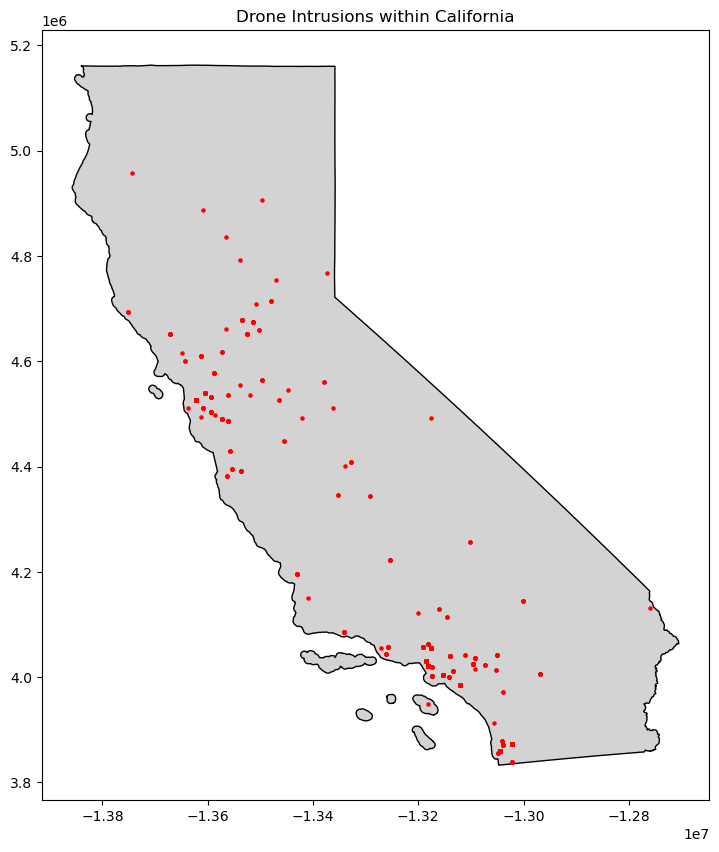

In [19]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import re

# Function to safely convert coordinates
def safe_convert_to_decimal(coord):
    """
    Convert a coordinate in degrees, minutes, seconds format to decimal degrees.
    Handles directional indicators (N, S, E, W) and skips invalid rows.
    """
    try:
        # Check if already in decimal format
        return float(coord)
    except ValueError:
        pass

    # Regex for degrees-minutes-seconds (DMS) format
    match = re.match(r'([NSWE])?(\d+)-(\d+)-(\d+\.\d+)([NSWE])?', coord)
    if match:
        direction, degrees, minutes, seconds, suffix = match.groups()
        degrees = float(degrees)
        minutes = float(minutes)
        seconds = float(seconds)

        # Convert DMS to decimal
        decimal = degrees + (minutes / 60) + (seconds / 3600)

        # Adjust for direction
        if direction in ['S', 'W'] or suffix in ['S', 'W']:
            decimal = -decimal
        
        return decimal

    # Regex for degrees-minutes format
    match = re.match(r'([NSWE])?(\d+)-(\d+\.\d+)([NSWE])?', coord)
    if match:
        direction, degrees, minutes, suffix = match.groups()
        degrees = float(degrees)
        minutes = float(minutes)

        # Convert DM to decimal
        decimal = degrees + (minutes / 60)

        # Adjust for direction
        if direction in ['S', 'W'] or suffix in ['S', 'W']:
            decimal = -decimal
        
        return decimal

    # Skip invalid rows
    return None

# Apply safe conversion
df['latitude'] = df['latitude'].apply(safe_convert_to_decimal)
df['longitude'] = df['longitude'].apply(safe_convert_to_decimal)

# Drop rows with invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# Convert latitude and longitude to GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"  # Assuming WGS84 coordinate system
)

# Read the California boundary shapefile
ca_state = gpd.read_file("ca_state")

# Ensure both GeoDataFrames are in the same CRS
gdf_points = gdf_points.to_crs(ca_state.crs)

# Perform a spatial join or filter points that fall within California
points_within_ca = gdf_points[gdf_points.geometry.within(ca_state.unary_union)]

# Plot the points within California
ax = ca_state.plot(color="lightgray", edgecolor="black", figsize=(10, 10))
plt.title("Drone Intrusions within California")
points_within_ca.plot(ax=ax, color="red", markersize=5)


<Axes: >

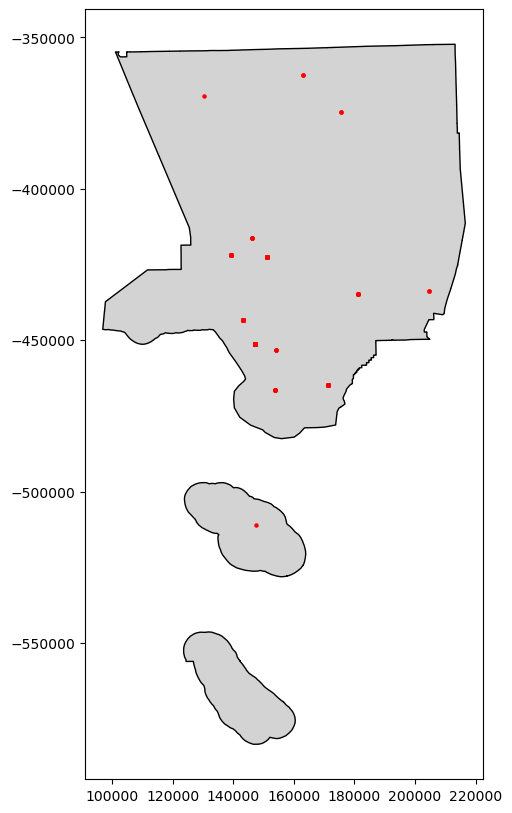

In [23]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import re

# Function to safely convert coordinates
def safe_convert_to_decimal(coord):
    """
    Convert a coordinate in degrees, minutes, seconds format to decimal degrees.
    Handles directional indicators (N, S, E, W) and skips invalid rows.
    """
    try:
        # Check if already in decimal format
        return float(coord)
    except ValueError:
        pass

    # Regex for degrees-minutes-seconds (DMS) format
    match = re.match(r'([NSWE])?(\d+)-(\d+)-(\d+\.\d+)([NSWE])?', coord)
    if match:
        direction, degrees, minutes, seconds, suffix = match.groups()
        degrees = float(degrees)
        minutes = float(minutes)
        seconds = float(seconds)

        # Convert DMS to decimal
        decimal = degrees + (minutes / 60) + (seconds / 3600)

        # Adjust for direction
        if direction in ['S', 'W'] or suffix in ['S', 'W']:
            decimal = -decimal
        
        return decimal

    # Regex for degrees-minutes format
    match = re.match(r'([NSWE])?(\d+)-(\d+\.\d+)([NSWE])?', coord)
    if match:
        direction, degrees, minutes, suffix = match.groups()
        degrees = float(degrees)
        minutes = float(minutes)

        # Convert DM to decimal
        decimal = degrees + (minutes / 60)

        # Adjust for direction
        if direction in ['S', 'W'] or suffix in ['S', 'W']:
            decimal = -decimal
        
        return decimal

    # Skip invalid rows
    return None

# Read the drone intrusion dataset
df = pd.read_csv("fully_merged_dataset.csv")

# Apply safe conversion to latitude and longitude
df['latitude'] = df['latitude'].apply(safe_convert_to_decimal)
df['longitude'] = df['longitude'].apply(safe_convert_to_decimal)

# Drop rows with invalid coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# Convert to GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"  # Assuming WGS84 coordinate system
)

# Read the California counties shapefile
ca_counties = gpd.read_file("ca_counties 2")

# Filter for Los Angeles County
lax_county = ca_counties[ca_counties['NAME'].str.contains("Los Angeles", case=False)]


# Ensure both GeoDataFrames are in the same CRS
lax_county = lax_county.to_crs("EPSG:3310")
gdf_points = gdf_points.to_crs("EPSG:3310")


# Perform a spatial filter for points within Los Angeles County
points_in_lax = gdf_points[gdf_points.geometry.within(lax_county.unary_union)]

# Plot the drone intrusions in Los Angeles County
ax = lax_county.plot(color="lightgray", edgecolor="black", figsize=(10, 10))
points_in_lax.plot(ax=ax, color="red", markersize=5)
